In [20]:
import random
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

from dumbbells.dataset import *
from dumbbells.agent import *
from dumbbells.q_functions import *
from dumbbells.models import *
from dumbbells.trainer import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hyper parameters

In [21]:
ENV = "CartPole-v1"  # "MountainCar-v0"
MEMORY_BUFFER = 256  # 10000

GAMMA = 0.999
ARCH = FcSimpleDqn

EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200 

In [22]:
def seed_everyting(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    

def set_up():
    dataset = Dataset(ENV, MEMORY_BUFFER)
    arch = ARCH(dataset.state_space.shape[0], dataset.action_space.n)
    q_func = DnnQFunction(arch, GAMMA)
    agent = Agent(
        q_func, 
        dataset.action_space, 
        dataset.state_space, 
        dataset.reward_space, 
        EPS_START, 
        EPS_END, 
        EPS_DECAY, 
    )

    return dataset, agent


def train_instance(dataset, agent, iterations=1000, seed=1):
    seed_everyting(seed)
    
    trainer = Trainer(dataset, agent, offline_update=10, batch_size=1024)
    trainer.train(iterations)

    durations = trainer.ep_durations
    losses = trainer.losses

    return durations, losses


SEED_RES = {}
def run_experiment(start, end):
    for i in tqdm(range(start, end)):
        dataset, agent = set_up()
        durations, losses = train_instance(dataset, agent, seed=i)

        print(f"Seed: {i}, max_duration: {max(durations)}, top 100 avg: {pd.Series(durations).rolling(100).mean().max()}")
        SEED_RES[i] = (durations, losses)


def display_seed_stats(seed):
    durations, losses = SEED_RES[seed]
    durations, losses = pd.Series(durations), pd.Series(losses)

    print(f"Max duration: {durations.max()}, max 100 avg: {durations.rolling(100).mean().max()}")
    
    plt.figure(figsize=(17, 7))
    plt.plot(durations, alpha=0.5, label="durations")
    plt.plot(durations.rolling(10).mean(), label="10 mean durations")
    plt.plot(durations.rolling(100).mean(), label="100 mean durations")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(17, 7))
    plt.plot(losses, alpha=0.5, label="losses")
    plt.plot(losses.rolling(10).mean(), label="10 mean losses")
    plt.plot(losses.rolling(100).mean(), label="100 mean losses")
    plt.grid()
    plt.legend()
    plt.show()

## Training

In [25]:
seed_everyting(17)

dataset, agent = set_up()

trainer = Trainer(dataset, agent, offline_update=5, batch_size=16)
trainer.train(10000)

100%|██████████| 10000/10000 [01:06<00:00, 150.93it/s]


len(dataset) = 256
len(trainer.ep_durations) = 10000


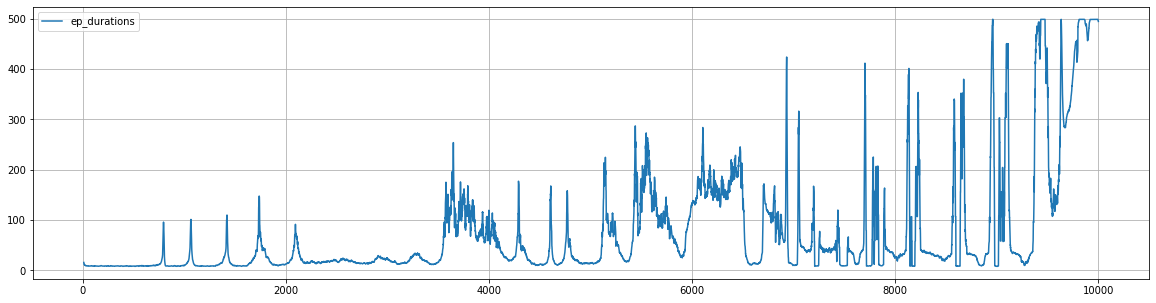

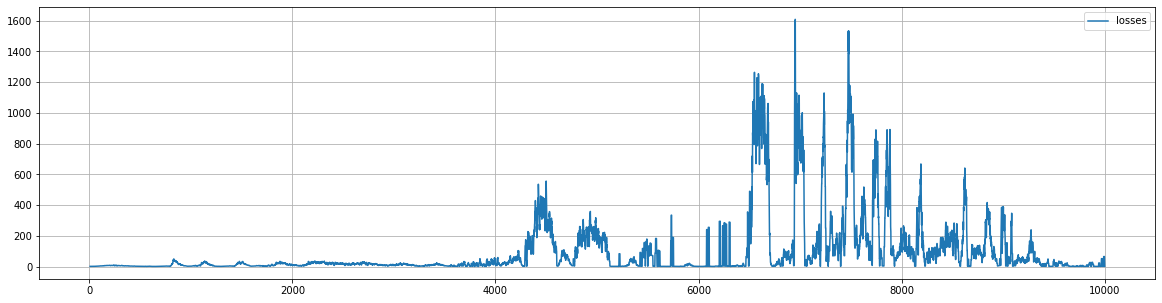

In [26]:
print(f"{len(dataset) = }")
print(f"{len(trainer.ep_durations) = }")

plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(pd.Series(trainer.ep_durations).rolling(10).mean(), label="ep_durations")
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(pd.Series(trainer.losses).rolling(10).mean(), label="losses")
plt.legend()
plt.show()

## Seed search

In [10]:
run_experiment(0, 20)

  5%|▌         | 1/20 [00:17<05:32, 17.52s/it]

Seed: 0, max_duration: 14, top 100 avg: 8.8


 10%|█         | 2/20 [00:35<05:15, 17.52s/it]

Seed: 1, max_duration: 15, top 100 avg: 8.89


 15%|█▌        | 3/20 [00:52<04:58, 17.57s/it]

Seed: 2, max_duration: 14, top 100 avg: 8.8


 20%|██        | 4/20 [01:10<04:40, 17.55s/it]

Seed: 3, max_duration: 14, top 100 avg: 8.87


 25%|██▌       | 5/20 [01:27<04:22, 17.52s/it]

Seed: 4, max_duration: 16, top 100 avg: 8.94


 30%|███       | 6/20 [01:45<04:06, 17.64s/it]

Seed: 5, max_duration: 14, top 100 avg: 8.87


 35%|███▌      | 7/20 [02:03<03:50, 17.69s/it]

Seed: 6, max_duration: 16, top 100 avg: 8.93


 40%|████      | 8/20 [02:20<03:31, 17.66s/it]

Seed: 7, max_duration: 15, top 100 avg: 8.83


 45%|████▌     | 9/20 [02:38<03:14, 17.64s/it]

Seed: 8, max_duration: 12, top 100 avg: 8.88


 50%|█████     | 10/20 [02:56<02:57, 17.73s/it]

Seed: 9, max_duration: 13, top 100 avg: 8.82


 55%|█████▌    | 11/20 [03:14<02:39, 17.75s/it]

Seed: 10, max_duration: 15, top 100 avg: 8.82


 60%|██████    | 12/20 [03:31<02:21, 17.74s/it]

Seed: 11, max_duration: 14, top 100 avg: 8.8


 65%|██████▌   | 13/20 [03:49<02:03, 17.66s/it]

Seed: 12, max_duration: 14, top 100 avg: 8.91


 70%|███████   | 14/20 [04:07<01:45, 17.65s/it]

Seed: 13, max_duration: 13, top 100 avg: 8.82


 75%|███████▌  | 15/20 [04:24<01:28, 17.67s/it]

Seed: 14, max_duration: 13, top 100 avg: 8.79


 80%|████████  | 16/20 [04:42<01:10, 17.66s/it]

Seed: 15, max_duration: 13, top 100 avg: 8.84


 85%|████████▌ | 17/20 [05:00<00:52, 17.64s/it]

Seed: 16, max_duration: 14, top 100 avg: 8.86


 90%|█████████ | 18/20 [05:17<00:35, 17.62s/it]

Seed: 17, max_duration: 189, top 100 avg: 21.4


 95%|█████████▌| 19/20 [05:35<00:17, 17.67s/it]

Seed: 18, max_duration: 14, top 100 avg: 8.93


100%|██████████| 20/20 [05:52<00:00, 17.65s/it]


Seed: 19, max_duration: 18, top 100 avg: 8.82


TypeError: cannot unpack non-iterable NoneType object

Max duration: 189, max 100 avg: 21.4


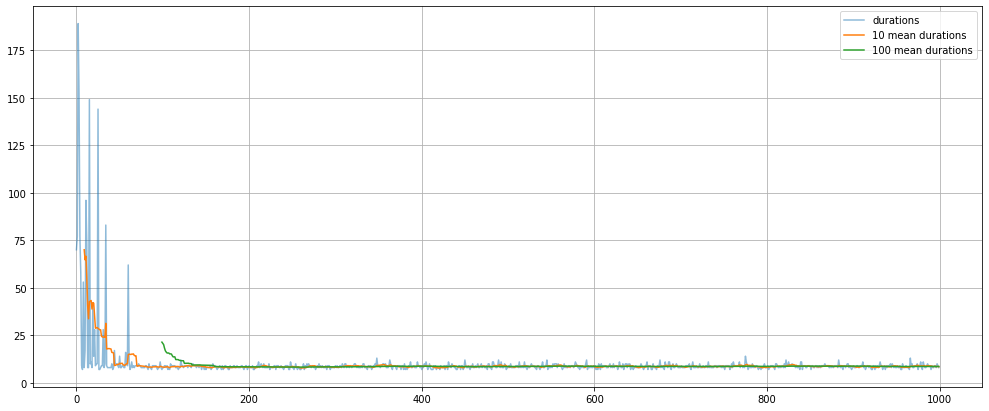

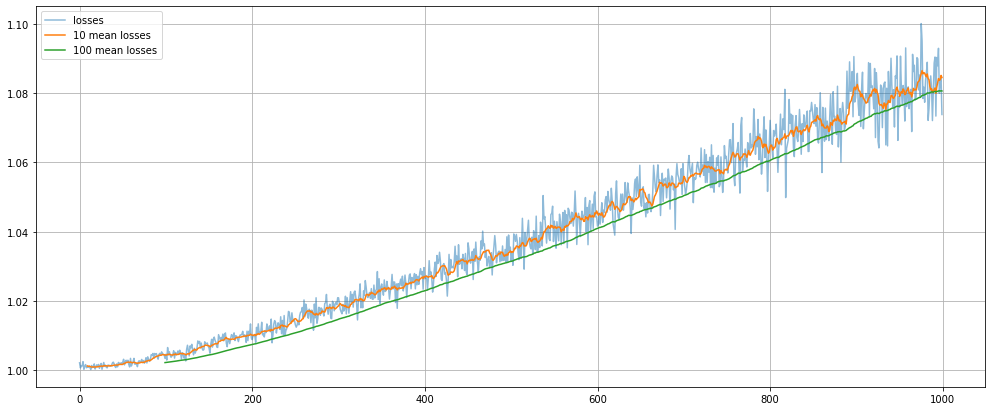

In [11]:
display_seed_stats(17)

In [38]:
raise ValueError("Results already exported!")

with open("seed-results.pkl", "wb") as result_file:
    pickle.dump(SEED_RES, result_file)

In [31]:
data = Dataset(ENV, 256, produce_gif=True)

done = False
state = data.reset()

for i in range(500):
    if done:
        break

    action = agent.action(state)
    state, reward, done = data.step(action.item())


ImportError: 
    Error occurred while running `from pyglet.gl import *`
    HINT: make sure you have OpenGL install. On Ubuntu, you can run 'apt-get install python-opengl'.
    If you're running on a server, you may need a virtual frame buffer; something like this should work:
    'xvfb-run -s "-screen 0 1400x900x24" python <your_script.py>'
    